In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn
import copy

In [2]:
path=os.path.splitext("./positions.json")
df = pd.read_json('./positions.json')
df.describe().transpose()
dft = pd.DataFrame(df,columns=['time'],dtype=float)
df = pd.DataFrame(df,columns=['x','y'],dtype=float)
N=len(df)
data=np.zeros(N*2)
data.dtype = 'float64'
data=data.reshape(N,2)
data=np.array(df)
datat=np.zeros(N)
datat.dtype='uint64'
datat=datat.reshape(N,1)
datat=np.array(dft)
def create_dataset(data,n_predictions,n_next):
	cnt=0
	cnt2=0
	dim = data.shape[1]
	X, Y = [], []
	for i in range(data.shape[0]-n_predictions-n_next-1):
		a = data[i:(i+n_predictions),:]   
		dt=datat[i:(i+n_predictions+n_next)]
		bol=1
		for j in range (i+1,i+n_predictions+n_next):
			if (datat[j]-datat[j-1]>=1000):
				bol=0
				break
		if (bol==0):
			cnt=cnt+1
			continue            
		X.append(a)
		tempb = data[(i+n_predictions+n_next-1):(i+n_predictions+n_next),:]
		b = []
		for j in range(len(tempb)):
			for k in range(dim):
				b.append(tempb[j,k])
		Y.append(b)
	X = np.array(X,dtype='float64')
	Y = np.array(Y,dtype='float64')
	return X, Y




In [3]:
X,Y=create_dataset(data,30,10)

In [4]:
X,Y=sklearn.utils.shuffle(X,Y)
n=len(X)
train_X=X[0:int(n*0.7)]
train_Y=Y[0:int(n*0.7)]
val_X=X[int(n*0.7):int(n*0.9)]
val_Y=Y[int(n*0.7):int(n*0.9)]
test_X=X[int(n*0.9):]
test_Y=Y[int(n*0.9):]


In [5]:
def trainModel(train_X, train_Y,val_X,val_Y):
	
	model = tf.keras.Sequential()
	model.add(tf.keras.layers.LSTM(
		256,
		input_shape=(train_X.shape[1], train_X.shape[2]),
		return_sequences=True))
	model.add(tf.keras.layers.Dropout(0.3))
	
	model.add(tf.keras.layers.LSTM(
		256,
		input_shape=(train_X.shape[1], train_X.shape[2]),
		return_sequences=False))
	model.add(tf.keras.layers.Dropout(0.3))
	model.add(tf.keras.layers.Dense(
			train_Y.shape[1]))
	model.add(tf.keras.layers.Activation("relu"))
	model.compile(loss='mse', optimizer='adam',metrics=['mae','acc'])
	model.summary()
	
	history=model.fit(train_X, train_Y, epochs=512, batch_size=256, verbose=1 ,validation_data=(val_X, val_Y),)
	loss = history.history['loss']
	val_loss = history.history['val_loss']
	accuracy = history.history['acc']
	val_accuracy = history.history['val_acc']
	fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
	
	# Plot loss
	ax1.plot(loss, label='Train Loss')
	ax1.plot(val_loss, label='Validation Loss')
	ax1.set_title('Training and Validation Loss')
	ax1.set_xlabel('Epochs')
	ax1.set_ylabel('Loss')
	ax1.legend()
	
	# Plot accuracy
	ax2.plot(accuracy, label='Train Accuracy')
	ax2.plot(val_accuracy, label='Validation Accuracy')
	ax2.set_title('Training and Validation Accuracy')
	ax2.set_xlabel('Epochs')
	ax2.set_ylabel('Accuracy')
	ax2.legend()
	
	plt.tight_layout()
	plt.show()
	return model,history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           265216    
                                                                 
 dropout (Dropout)           (None, 30, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 791,042
Trainable params: 791,042
Non-trai

Epoch 43/512
235/235 [==============================] - 3s 11ms/step - loss: 0.0018 - mae: 0.0297 - acc: 0.9515 - val_loss: 0.0015 - val_mae: 0.0243 - val_acc: 0.9546
Epoch 44/512
235/235 [==============================] - 2s 10ms/step - loss: 0.0017 - mae: 0.0289 - acc: 0.9526 - val_loss: 0.0014 - val_mae: 0.0238 - val_acc: 0.9570
Epoch 45/512
235/235 [==============================] - 3s 11ms/step - loss: 0.0017 - mae: 0.0290 - acc: 0.9515 - val_loss: 0.0014 - val_mae: 0.0235 - val_acc: 0.9605
Epoch 46/512
235/235 [==============================] - 2s 11ms/step - loss: 0.0018 - mae: 0.0296 - acc: 0.9509 - val_loss: 0.0014 - val_mae: 0.0252 - val_acc: 0.9569
Epoch 47/512
235/235 [==============================] - 2s 11ms/step - loss: 0.0017 - mae: 0.0288 - acc: 0.9537 - val_loss: 0.0015 - val_mae: 0.0247 - val_acc: 0.9571
Epoch 48/512
235/235 [==============================] - 2s 10ms/step - loss: 0.0017 - mae: 0.0291 - acc: 0.9521 - val_loss: 0.0015 - val_mae: 0.0243 - val_acc: 0.960

235/235 [==============================] - 3s 11ms/step - loss: 0.0010 - mae: 0.0228 - acc: 0.9652 - val_loss: 9.9748e-04 - val_mae: 0.0198 - val_acc: 0.9670
Epoch 92/512
235/235 [==============================] - 3s 11ms/step - loss: 9.6631e-04 - mae: 0.0226 - acc: 0.9664 - val_loss: 6.9767e-04 - val_mae: 0.0168 - val_acc: 0.9689
Epoch 93/512
235/235 [==============================] - 3s 11ms/step - loss: 8.8619e-04 - mae: 0.0218 - acc: 0.9672 - val_loss: 6.9433e-04 - val_mae: 0.0173 - val_acc: 0.9687
Epoch 94/512
235/235 [==============================] - 3s 11ms/step - loss: 8.8226e-04 - mae: 0.0218 - acc: 0.9675 - val_loss: 7.0595e-04 - val_mae: 0.0167 - val_acc: 0.9699
Epoch 95/512
235/235 [==============================] - 2s 10ms/step - loss: 9.7176e-04 - mae: 0.0224 - acc: 0.9658 - val_loss: 8.6298e-04 - val_mae: 0.0191 - val_acc: 0.9673
Epoch 96/512
235/235 [==============================] - 2s 10ms/step - loss: 8.8871e-04 - mae: 0.0219 - acc: 0.9676 - val_loss: 7.1919e-04 - v

Epoch 138/512
235/235 [==============================] - 2s 11ms/step - loss: 6.6001e-04 - mae: 0.0188 - acc: 0.9731 - val_loss: 4.6829e-04 - val_mae: 0.0136 - val_acc: 0.9775
Epoch 139/512
235/235 [==============================] - 2s 11ms/step - loss: 6.2576e-04 - mae: 0.0184 - acc: 0.9734 - val_loss: 5.0534e-04 - val_mae: 0.0145 - val_acc: 0.9761
Epoch 140/512
235/235 [==============================] - 2s 10ms/step - loss: 6.9665e-04 - mae: 0.0191 - acc: 0.9729 - val_loss: 7.1902e-04 - val_mae: 0.0169 - val_acc: 0.9709
Epoch 141/512
235/235 [==============================] - 2s 11ms/step - loss: 6.4685e-04 - mae: 0.0187 - acc: 0.9733 - val_loss: 4.6838e-04 - val_mae: 0.0141 - val_acc: 0.9765
Epoch 142/512
235/235 [==============================] - 2s 11ms/step - loss: 5.9339e-04 - mae: 0.0181 - acc: 0.9751 - val_loss: 5.0999e-04 - val_mae: 0.0147 - val_acc: 0.9751
Epoch 143/512
235/235 [==============================] - 3s 11ms/step - loss: 6.4333e-04 - mae: 0.0187 - acc: 0.9736 - v

235/235 [==============================] - 2s 10ms/step - loss: 5.8709e-04 - mae: 0.0178 - acc: 0.9747 - val_loss: 3.8374e-04 - val_mae: 0.0123 - val_acc: 0.9807
Epoch 185/512
235/235 [==============================] - 2s 10ms/step - loss: 5.1396e-04 - mae: 0.0169 - acc: 0.9770 - val_loss: 4.3733e-04 - val_mae: 0.0141 - val_acc: 0.9781
Epoch 186/512
235/235 [==============================] - 2s 10ms/step - loss: 5.0507e-04 - mae: 0.0168 - acc: 0.9770 - val_loss: 3.4848e-04 - val_mae: 0.0118 - val_acc: 0.9809
Epoch 187/512
235/235 [==============================] - 2s 10ms/step - loss: 5.3665e-04 - mae: 0.0171 - acc: 0.9760 - val_loss: 3.9164e-04 - val_mae: 0.0120 - val_acc: 0.9800
Epoch 188/512
235/235 [==============================] - 2s 11ms/step - loss: 5.3859e-04 - mae: 0.0172 - acc: 0.9762 - val_loss: 3.7147e-04 - val_mae: 0.0116 - val_acc: 0.9781
Epoch 189/512
235/235 [==============================] - 2s 11ms/step - loss: 5.1131e-04 - mae: 0.0168 - acc: 0.9767 - val_loss: 3.501

Epoch 231/512
235/235 [==============================] - 2s 10ms/step - loss: 7.0542e-04 - mae: 0.0188 - acc: 0.9714 - val_loss: 5.4605e-04 - val_mae: 0.0141 - val_acc: 0.9733
Epoch 232/512
235/235 [==============================] - 2s 10ms/step - loss: 6.2495e-04 - mae: 0.0174 - acc: 0.9754 - val_loss: 4.3531e-04 - val_mae: 0.0128 - val_acc: 0.9785
Epoch 233/512
235/235 [==============================] - 2s 10ms/step - loss: 5.9177e-04 - mae: 0.0172 - acc: 0.9772 - val_loss: 5.3743e-04 - val_mae: 0.0144 - val_acc: 0.9743
Epoch 234/512
235/235 [==============================] - 2s 10ms/step - loss: 5.6970e-04 - mae: 0.0170 - acc: 0.9762 - val_loss: 5.0925e-04 - val_mae: 0.0137 - val_acc: 0.9764
Epoch 235/512
235/235 [==============================] - 2s 10ms/step - loss: 4.8543e-04 - mae: 0.0164 - acc: 0.9777 - val_loss: 3.0922e-04 - val_mae: 0.0108 - val_acc: 0.9800
Epoch 236/512
235/235 [==============================] - 2s 10ms/step - loss: 4.4426e-04 - mae: 0.0157 - acc: 0.9785 - v

235/235 [==============================] - 2s 10ms/step - loss: 4.3120e-04 - mae: 0.0155 - acc: 0.9792 - val_loss: 2.9431e-04 - val_mae: 0.0104 - val_acc: 0.9813
Epoch 278/512
235/235 [==============================] - 2s 10ms/step - loss: 4.2522e-04 - mae: 0.0154 - acc: 0.9795 - val_loss: 3.4416e-04 - val_mae: 0.0123 - val_acc: 0.9780
Epoch 279/512
235/235 [==============================] - 2s 10ms/step - loss: 4.3151e-04 - mae: 0.0155 - acc: 0.9794 - val_loss: 3.0181e-04 - val_mae: 0.0105 - val_acc: 0.9835
Epoch 280/512
235/235 [==============================] - 2s 11ms/step - loss: 4.2697e-04 - mae: 0.0155 - acc: 0.9795 - val_loss: 2.9039e-04 - val_mae: 0.0109 - val_acc: 0.9822
Epoch 281/512
235/235 [==============================] - 2s 10ms/step - loss: 4.4009e-04 - mae: 0.0156 - acc: 0.9789 - val_loss: 3.0283e-04 - val_mae: 0.0111 - val_acc: 0.9812
Epoch 282/512
235/235 [==============================] - 2s 10ms/step - loss: 4.2642e-04 - mae: 0.0154 - acc: 0.9791 - val_loss: 3.302

235/235 [==============================] - 2s 10ms/step - loss: 4.0902e-04 - mae: 0.0151 - acc: 0.9801 - val_loss: 2.6074e-04 - val_mae: 0.0100 - val_acc: 0.9828
Epoch 324/512
235/235 [==============================] - 2s 10ms/step - loss: 4.1080e-04 - mae: 0.0151 - acc: 0.9801 - val_loss: 2.8833e-04 - val_mae: 0.0105 - val_acc: 0.9825
Epoch 325/512
235/235 [==============================] - 3s 11ms/step - loss: 3.9930e-04 - mae: 0.0149 - acc: 0.9803 - val_loss: 2.8535e-04 - val_mae: 0.0098 - val_acc: 0.9849
Epoch 326/512
235/235 [==============================] - 3s 11ms/step - loss: 4.0153e-04 - mae: 0.0150 - acc: 0.9802 - val_loss: 3.0354e-04 - val_mae: 0.0111 - val_acc: 0.9823
Epoch 327/512
235/235 [==============================] - 2s 10ms/step - loss: 4.2613e-04 - mae: 0.0154 - acc: 0.9803 - val_loss: 2.9136e-04 - val_mae: 0.0106 - val_acc: 0.9834
Epoch 328/512
235/235 [==============================] - 3s 11ms/step - loss: 4.2208e-04 - mae: 0.0151 - acc: 0.9806 - val_loss: 3.204

235/235 [==============================] - 3s 11ms/step - loss: 3.8451e-04 - mae: 0.0146 - acc: 0.9811 - val_loss: 2.4128e-04 - val_mae: 0.0095 - val_acc: 0.9832
Epoch 370/512
235/235 [==============================] - 3s 11ms/step - loss: 3.7694e-04 - mae: 0.0145 - acc: 0.9812 - val_loss: 2.6319e-04 - val_mae: 0.0100 - val_acc: 0.9833
Epoch 371/512
235/235 [==============================] - 3s 11ms/step - loss: 4.0214e-04 - mae: 0.0149 - acc: 0.9808 - val_loss: 2.7711e-04 - val_mae: 0.0106 - val_acc: 0.9825
Epoch 372/512
235/235 [==============================] - 3s 11ms/step - loss: 3.8715e-04 - mae: 0.0147 - acc: 0.9819 - val_loss: 2.9842e-04 - val_mae: 0.0105 - val_acc: 0.9816
Epoch 373/512
235/235 [==============================] - 3s 11ms/step - loss: 3.8783e-04 - mae: 0.0147 - acc: 0.9810 - val_loss: 2.7062e-04 - val_mae: 0.0101 - val_acc: 0.9829
Epoch 374/512
235/235 [==============================] - 3s 11ms/step - loss: 4.5475e-04 - mae: 0.0155 - acc: 0.9792 - val_loss: 3.290

235/235 [==============================] - 3s 11ms/step - loss: 3.6865e-04 - mae: 0.0143 - acc: 0.9819 - val_loss: 2.4779e-04 - val_mae: 0.0098 - val_acc: 0.9798
Epoch 416/512
235/235 [==============================] - 3s 11ms/step - loss: 3.8417e-04 - mae: 0.0145 - acc: 0.9809 - val_loss: 2.5365e-04 - val_mae: 0.0098 - val_acc: 0.9841
Epoch 417/512
235/235 [==============================] - 3s 11ms/step - loss: 3.7953e-04 - mae: 0.0145 - acc: 0.9814 - val_loss: 2.5035e-04 - val_mae: 0.0095 - val_acc: 0.9828
Epoch 418/512
235/235 [==============================] - 3s 11ms/step - loss: 3.7030e-04 - mae: 0.0143 - acc: 0.9813 - val_loss: 2.6010e-04 - val_mae: 0.0094 - val_acc: 0.9839
Epoch 419/512
235/235 [==============================] - 3s 11ms/step - loss: 3.6198e-04 - mae: 0.0142 - acc: 0.9817 - val_loss: 2.4399e-04 - val_mae: 0.0100 - val_acc: 0.9832
Epoch 420/512
235/235 [==============================] - 3s 11ms/step - loss: 3.7456e-04 - mae: 0.0144 - acc: 0.9803 - val_loss: 2.724

235/235 [==============================] - 2s 11ms/step - loss: 3.7071e-04 - mae: 0.0143 - acc: 0.9819 - val_loss: 2.4338e-04 - val_mae: 0.0091 - val_acc: 0.9846
Epoch 462/512
235/235 [==============================] - 2s 11ms/step - loss: 3.5929e-04 - mae: 0.0141 - acc: 0.9813 - val_loss: 2.6566e-04 - val_mae: 0.0104 - val_acc: 0.9841
Epoch 463/512
235/235 [==============================] - 2s 11ms/step - loss: 3.6306e-04 - mae: 0.0142 - acc: 0.9820 - val_loss: 2.4674e-04 - val_mae: 0.0098 - val_acc: 0.9847
Epoch 464/512
235/235 [==============================] - 2s 11ms/step - loss: 3.5670e-04 - mae: 0.0141 - acc: 0.9822 - val_loss: 2.5492e-04 - val_mae: 0.0100 - val_acc: 0.9832
Epoch 465/512
235/235 [==============================] - 3s 11ms/step - loss: 3.6533e-04 - mae: 0.0142 - acc: 0.9809 - val_loss: 2.4750e-04 - val_mae: 0.0095 - val_acc: 0.9833
Epoch 466/512
235/235 [==============================] - 3s 11ms/step - loss: 3.6637e-04 - mae: 0.0142 - acc: 0.9816 - val_loss: 2.292

235/235 [==============================] - 3s 11ms/step - loss: 3.6834e-04 - mae: 0.0143 - acc: 0.9814 - val_loss: 2.6137e-04 - val_mae: 0.0098 - val_acc: 0.9827
Epoch 508/512
235/235 [==============================] - 3s 11ms/step - loss: 3.4615e-04 - mae: 0.0138 - acc: 0.9820 - val_loss: 2.6167e-04 - val_mae: 0.0097 - val_acc: 0.9842
Epoch 509/512
235/235 [==============================] - 3s 11ms/step - loss: 3.4789e-04 - mae: 0.0139 - acc: 0.9821 - val_loss: 2.2784e-04 - val_mae: 0.0092 - val_acc: 0.9840
Epoch 510/512
235/235 [==============================] - 3s 11ms/step - loss: 3.5001e-04 - mae: 0.0139 - acc: 0.9818 - val_loss: 2.2236e-04 - val_mae: 0.0090 - val_acc: 0.9836
Epoch 511/512
235/235 [==============================] - 3s 11ms/step - loss: 3.5360e-04 - mae: 0.0140 - acc: 0.9823 - val_loss: 2.2623e-04 - val_mae: 0.0088 - val_acc: 0.9842
Epoch 512/512
235/235 [==============================] - 3s 11ms/step - loss: 3.5225e-04 - mae: 0.0140 - acc: 0.9819 - val_loss: 2.382

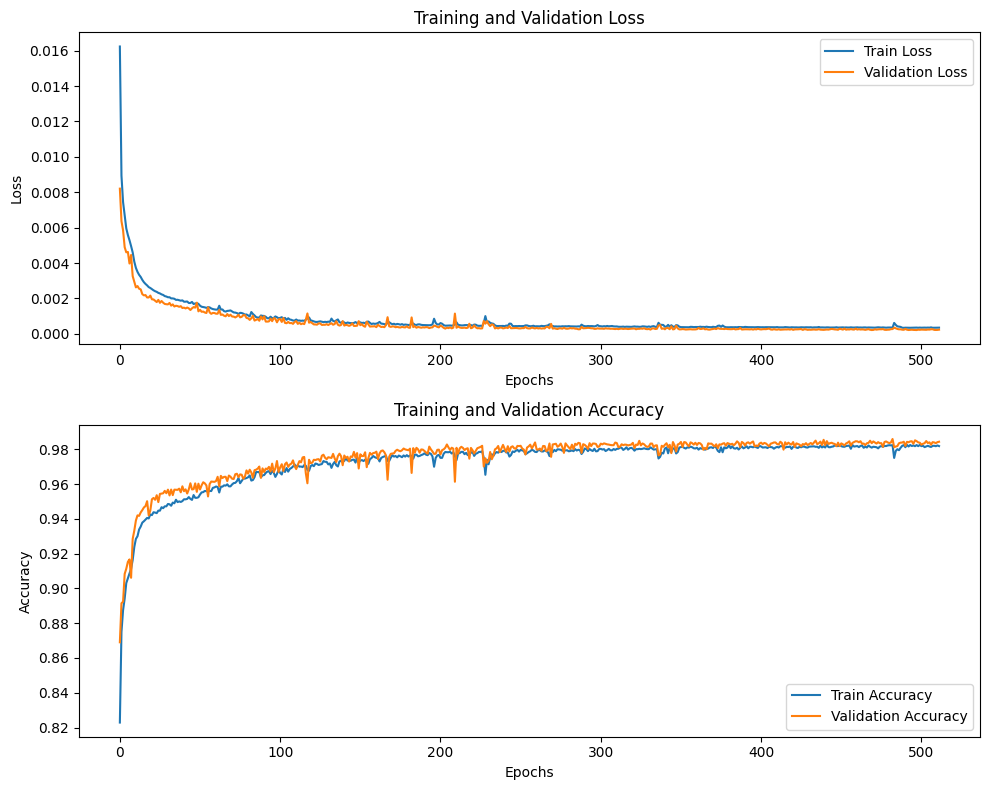

In [6]:
model,history=trainModel(train_X,train_Y,val_X,val_Y)

In [7]:
results=model.evaluate(test_X,test_Y,batch_size=128)

68/68 [==============================] - 1s 8ms/step - loss: 1.8800e-04 - mae: 0.0089 - acc: 0.9800


In [8]:
print("test loss,mse, test acc:", results)

model.save('saved_model/my_model')

test loss,mse, test acc: [0.00018799876852426678, 0.008899867534637451, 0.9799580574035645]


INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets
